# HO COT MM Nowcasting EDA 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import scipy.stats as stats

In [5]:
import sys
sys.path.append('../../../')

In [6]:
import matplotlib.pyplot as plt 

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [8]:
from src.utils.dates import get_nyse_business_dates
from src.utils.io.read import PreprocessedDataReader

In [9]:
from src.preprocessing.base import FutureTicker

In [10]:
from src.settings import Settings

In [11]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.HEATING_OIL)

In [14]:
dataset.shape

(809, 81)

In [15]:
dataset.tail(3)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
806,2025-06-17,HO,-94113.0,72420.0,166533.0,2156.0,43088.0,40932.0,-1096.0,-15055.0,...,250896.0,116650.0,-178799.0,-247835.0,36.35,-22.00,34.40,-22.15,32.91,-22.31
807,2025-06-24,HO,-101062.0,60660.0,161722.0,10738.0,52627.0,41889.0,-6949.0,-1096.0,...,116650.0,-221825.0,-247835.0,104997.0,-22.00,10.81,-22.15,5.59,-22.31,4.55
808,2025-07-01,HO,-104727.0,71449.0,176176.0,12898.0,54458.0,41560.0,-3665.0,-6949.0,...,-221825.0,NaN,104997.0,NaN,10.81,NaN,5.59,NaN,4.55,NaN


In [16]:
dataset['tradeDate'].min(),dataset['tradeDate'].max()

('2010-01-05', '2025-07-01')

In [17]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date 

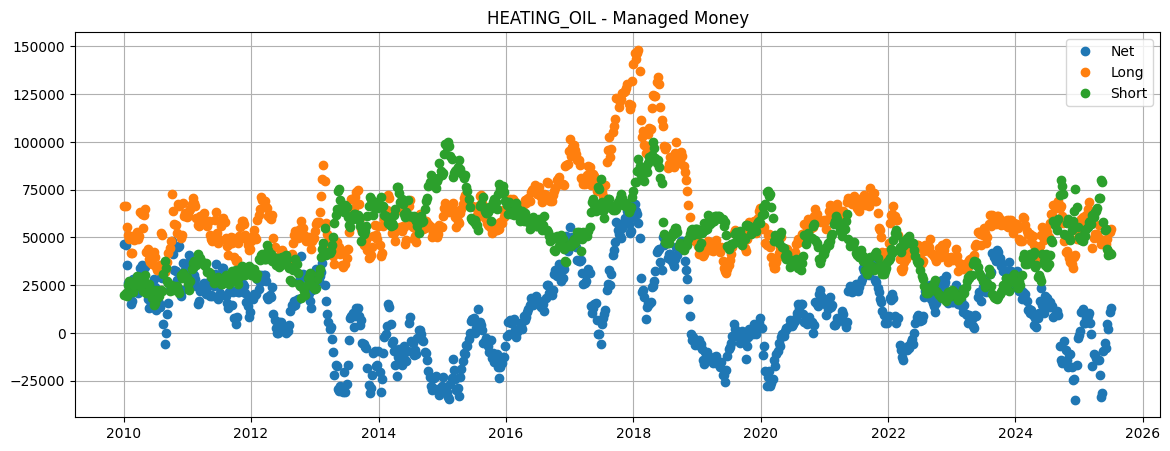

In [18]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_NetPosition'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_LongPosition'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_ShortPosition'])
plt.legend(['Net', 'Long', 'Short'])
plt.title('HEATING_OIL - Managed Money')
plt.grid()

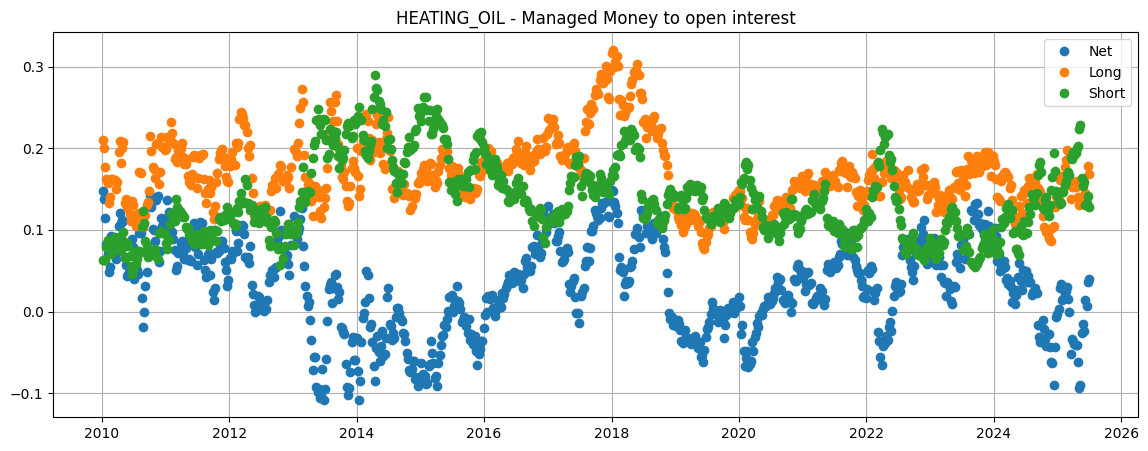

In [19]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_NetPosition_to_openinterest'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_LongPosition_to_openinterest'])
plt.plot_date(dataset['tradeDate'],dataset['ManagedMoney_ShortPosition_to_openinterest'])
plt.legend(['Net', 'Long', 'Short'])
plt.title('HEATING_OIL - Managed Money to open interest')
plt.grid()

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate'])
dataset['year']=dataset['tradeDate'].dt.year
dataset['day_of_week'] = dataset['tradeDate'].dt.day_name()
dataset['day_of_week'].unique()
dataset.sort_values(by = 'tradeDate', ascending = True, inplace = True)


In [21]:




# for feature_name in [
#                     'ManagedMoney_NetPosition',
#                     'ManagedMoney_LongPosition', 
#                     'ManagedMoney_ShortPosition']:
#     dataset[f'prior_report_{feature_name}_change'] = dataset[feature_name]- dataset[feature_name].shift(1)






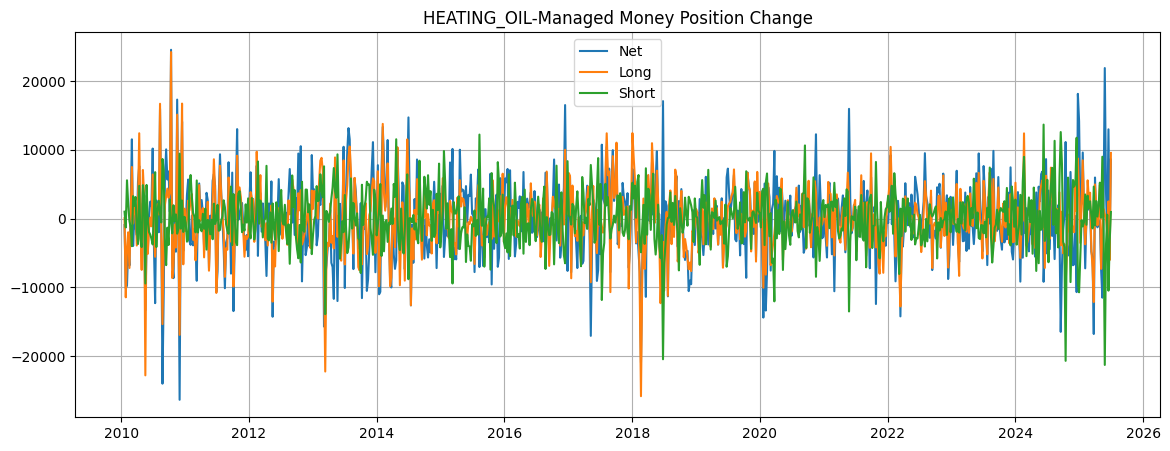

In [22]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_NetPosition_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_LongPosition_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_ShortPosition_change'], '-')
plt.legend(['Net', 'Long', 'Short'])
plt.title('HEATING_OIL-Managed Money Position Change')
plt.grid()

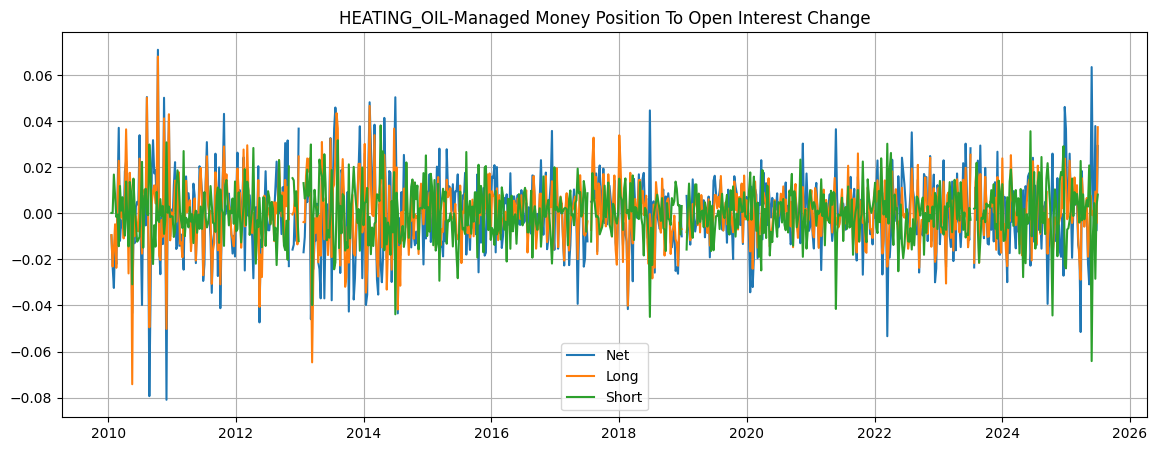

In [23]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_ManagedMoney_ShortPosition_to_openinterest_change'], '-')
plt.legend(['Net', 'Long', 'Short'])
plt.title('HEATING_OIL-Managed Money Position To Open Interest Change')
plt.grid()

In [24]:
dataset[['prior_report_ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change']].corr()

,prior_report_ManagedMoney_NetPosition_change,prior_report_ManagedMoney_LongPosition_change,prior_report_ManagedMoney_ShortPosition_change
prior_report_ManagedMoney_NetPosition_change,1.000000,0.722851,-0.557323
prior_report_ManagedMoney_LongPosition_change,0.722851,1.000000,0.170877
prior_report_ManagedMoney_ShortPosition_change,-0.557323,0.170877,1.000000


In [25]:
dataset[['prior_report_ManagedMoney_NetPosition_to_openinterest_change',
 'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
 'prior_report_ManagedMoney_ShortPosition_to_openinterest_change']].corr()

,prior_report_ManagedMoney_NetPosition_to_openinterest_change,prior_report_ManagedMoney_LongPosition_to_openinterest_change,prior_report_ManagedMoney_ShortPosition_to_openinterest_change
prior_report_ManagedMoney_NetPosition_to_openinterest_change,1.000000,0.734441,-0.572467
prior_report_ManagedMoney_LongPosition_to_openinterest_change,0.734441,1.000000,0.136020
prior_report_ManagedMoney_ShortPosition_to_openinterest_change,-0.572467,0.136020,1.000000


Text(0.5, 1.0, 'MM Long/OI  change')

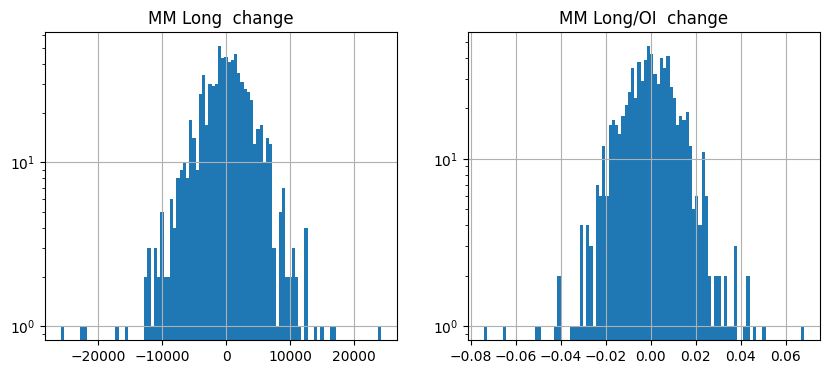

In [26]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_ManagedMoney_LongPosition_change'].hist(bins=100, log=True)
plt.title('MM Long  change')
plt.subplot(1, 2, 2)
dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('MM Long/OI  change')


Text(0.5, 1.0, 'MM Short/OI change')

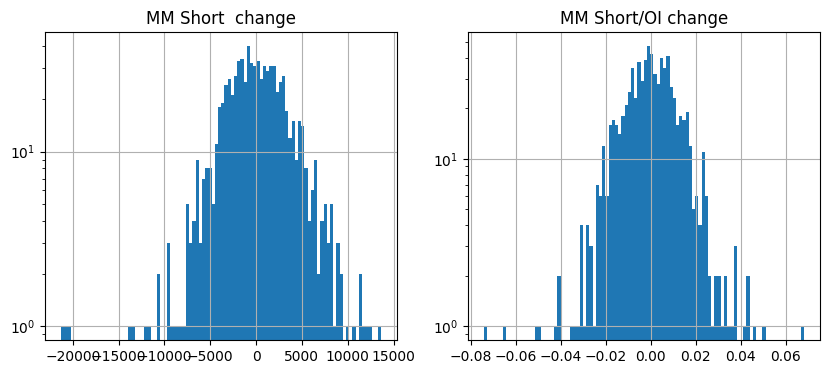

In [27]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_ManagedMoney_ShortPosition_change'].hist(bins=100, log=True)
plt.title('MM Short  change')
plt.subplot(1, 2, 2)
dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('MM Short/OI change')

Text(0.5, 1.0, 'MM Net/OI  change')

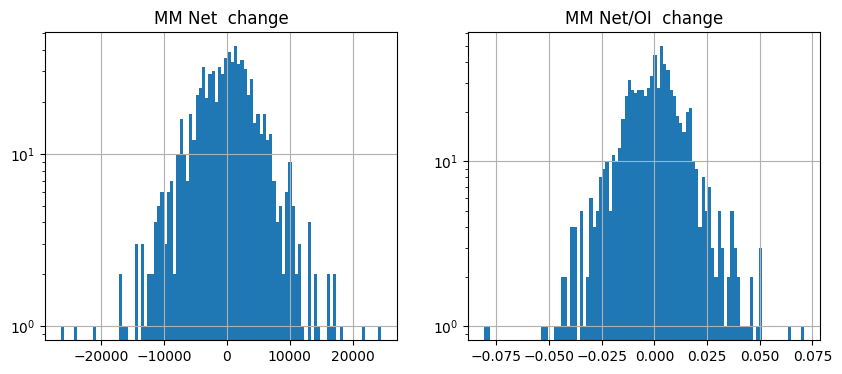

In [28]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_ManagedMoney_NetPosition_change'].hist(bins=100, log=True)
plt.title('MM Net  change')
plt.subplot(1, 2, 2)
dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('MM Net/OI  change')



In [29]:
from research.eda.probability_distributions import test_normality_shapiro

In [30]:
for f in ['prior_report_ManagedMoney_NetPosition_change', 
         'prior_report_ManagedMoney_LongPosition_change',
         'prior_report_ManagedMoney_ShortPosition_change']:
    print(f)
    result = test_normality_shapiro(
    dataset[f]
    )
    print(result)


prior_report_ManagedMoney_NetPosition_change
{'statistic': np.float64(0.9801288622117023), 'p_value': np.float64(5.115929173395237e-09), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_LongPosition_change
{'statistic': np.float64(0.9661598260289299), 'p_value': np.float64(1.0065972578274797e-12), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_ShortPosition_change
{'statistic': np.float64(0.9677242695285054), 'p_value': np.float64(2.3002373113065165e-12), 'alpha': 0.05, 'verdict': 'Not normal'}


In [31]:
for f in ['prior_report_ManagedMoney_NetPosition_to_openinterest_change', 
         'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
         'prior_report_ManagedMoney_ShortPosition_to_openinterest_change']:
    print(f)
    result = test_normality_shapiro(
    dataset[f]
    )
    print(result)


prior_report_ManagedMoney_NetPosition_to_openinterest_change
{'statistic': np.float64(0.9758849528560127), 'p_value': np.float64(3.5322659356537575e-10), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_LongPosition_to_openinterest_change
{'statistic': np.float64(0.9732052365858986), 'p_value': np.float64(6.676130388142826e-11), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_ManagedMoney_ShortPosition_to_openinterest_change
{'statistic': np.float64(0.9793367743257582), 'p_value': np.float64(3.6104693656443317e-09), 'alpha': 0.05, 'verdict': 'Not normal'}


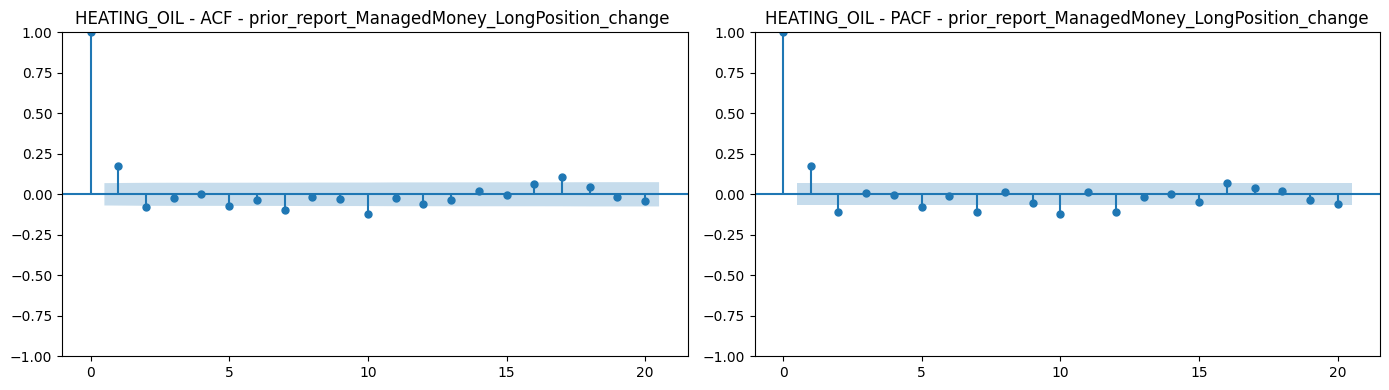

In [32]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_LongPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("HEATING_OIL - ACF - prior_report_ManagedMoney_LongPosition_change ")

plot_pacf(dataset['prior_report_ManagedMoney_LongPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("HEATING_OIL - PACF - prior_report_ManagedMoney_LongPosition_change")

plt.tight_layout()
plt.show()

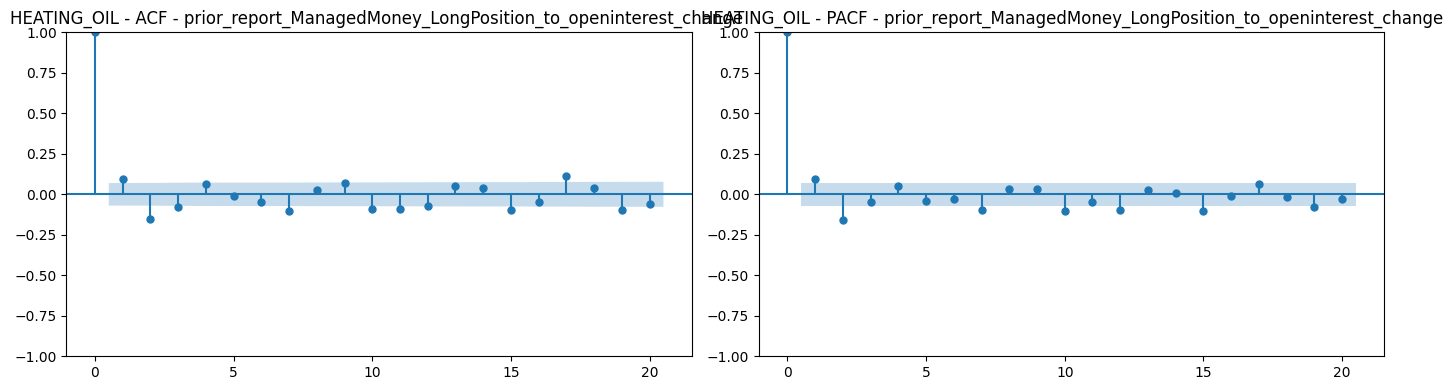

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("HEATING_OIL - ACF - prior_report_ManagedMoney_LongPosition_to_openinterest_change ")

plot_pacf(dataset['prior_report_ManagedMoney_LongPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("HEATING_OIL - PACF - prior_report_ManagedMoney_LongPosition_to_openinterest_change")

plt.tight_layout()
plt.show()

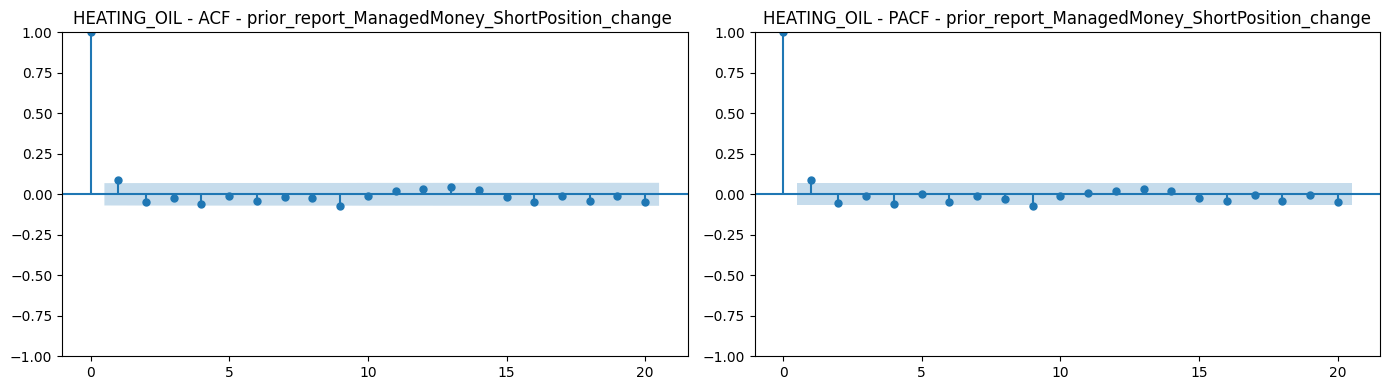

In [34]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_ShortPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("HEATING_OIL - ACF - prior_report_ManagedMoney_ShortPosition_change ")

plot_pacf(dataset['prior_report_ManagedMoney_ShortPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("HEATING_OIL - PACF - prior_report_ManagedMoney_ShortPosition_change")

plt.tight_layout()
plt.show()

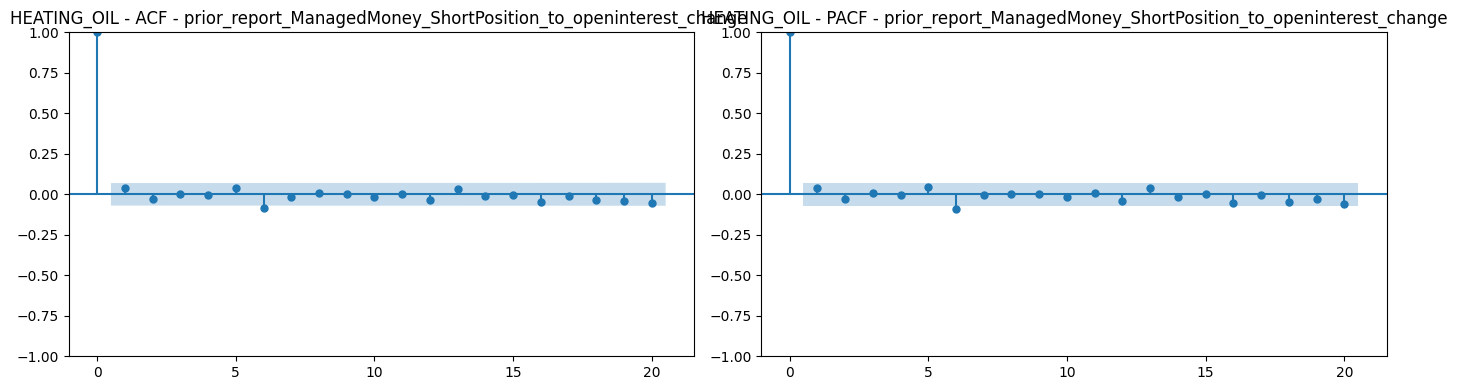

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_ShortPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("HEATING_OIL - ACF - prior_report_ManagedMoney_ShortPosition_to_openinterest_change ")

plot_pacf(dataset['prior_report_ManagedMoney_ShortPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("HEATING_OIL - PACF - prior_report_ManagedMoney_ShortPosition_to_openinterest_change")

plt.tight_layout()
plt.show()

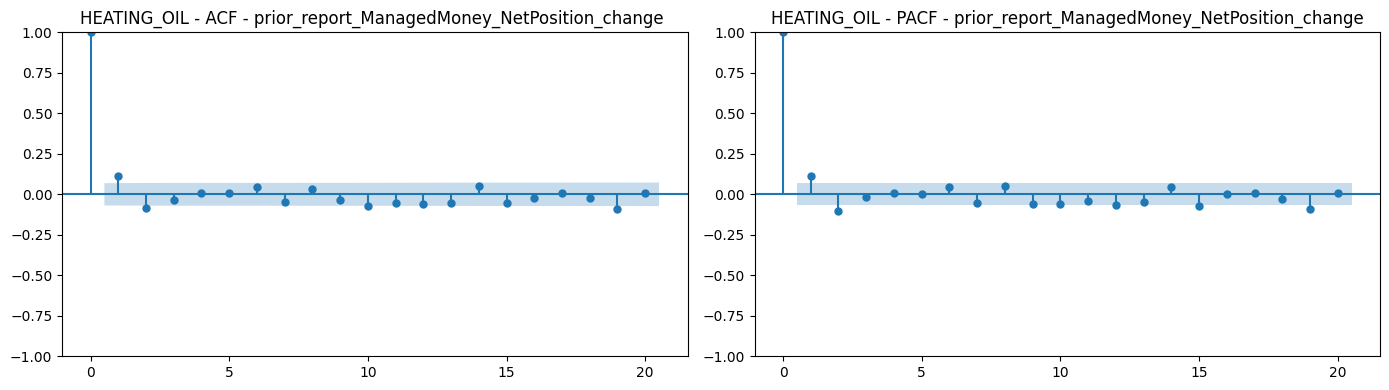

In [36]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("HEATING_OIL - ACF - prior_report_ManagedMoney_NetPosition_change ")

plot_pacf(dataset['prior_report_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("HEATING_OIL - PACF - prior_report_ManagedMoney_NetPosition_change")

plt.tight_layout()
plt.show()

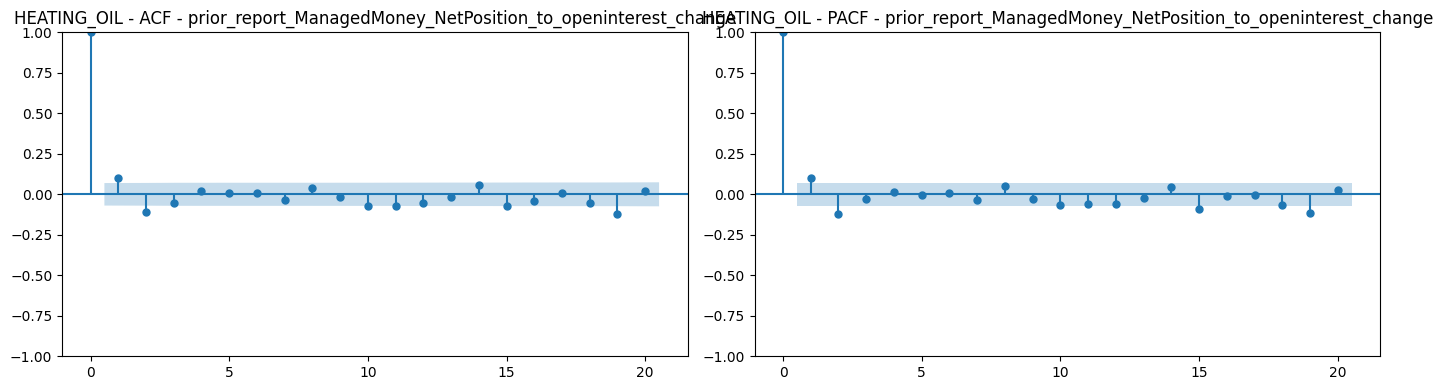

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("HEATING_OIL - ACF - prior_report_ManagedMoney_NetPosition_to_openinterest_change")

plot_pacf(dataset['prior_report_ManagedMoney_NetPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("HEATING_OIL - PACF - prior_report_ManagedMoney_NetPosition_to_openinterest_change")

plt.tight_layout()
plt.show()